<a href="https://colab.research.google.com/github/MaskiAymen/BookStoreProjectNodeJs/blob/master/EMSI_TP3_Etudiants_Transformer_based_Style_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Use a GPU (T4 is enough)
**Goal**: The goal of this lab is to predict the style of a music just by analyzing (classification task) the title (and more for the last part). We will use and finetune Transformers architecture.

# Step 1: Environment Setup and Installing Dependencies
In Google Colab, you need to install the required libraries, primarily Hugging Face's Transformers library and PyTorch. You can do this with the following commands:

In [1]:
!pip uninstall -y torch
!pip install transformers[torch]

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Successfully uninstalled torch-2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.

Then restart the environment if you are on colab

# Step 2: Preparing Your Dataset

Since you're focusing on predicting playlist_genre based on track_name, you'll preprocess track_name as input and playlist_genre as labels. Here's how you can prepare your dataset:

## Import Necessary Libraries:

In [2]:
import pandas as pd
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

In [11]:
!pip install seaborn


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


## Load and Preprocess the Dataset:

Read your dataset.
Tokenize track_name.
Convert playlist_genre into numerical labels.

Playlist Genre Counts:
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: playlist_genre, dtype: int64


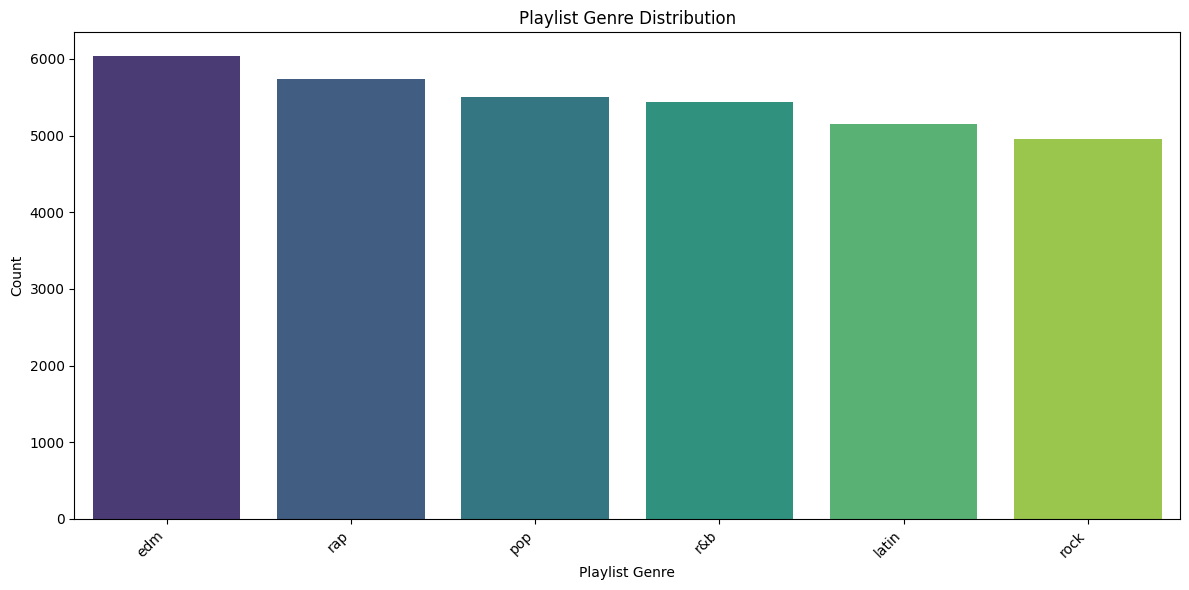

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Training data shape: (26262, 24)
Validation data shape: (6566, 24)


In [25]:
data_path = "./TP3_spotify_songs.csv"

# Load dataset
data = pd.read_csv(data_path)
# Drop nan values
data = data.dropna()

# Analyze and plot data (playlist_genre)
playlist_genre_counts = data['playlist_genre'].value_counts()

# Print the genre counts
print("Playlist Genre Counts:")
print(playlist_genre_counts)

# Plot the genre counts using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=data, order=playlist_genre_counts.index, palette='viridis')
plt.title('Playlist Genre Distribution')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize track names
tokenized_data = data['track_name'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Convert genres to categorical labels
data['genre_label'] = pd.Categorical(data['playlist_genre'])
data['genre_label'] = data['genre_label'].cat.codes

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Print information about the splits
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")

In [26]:
data.columns


Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre_label'],
      dtype='object')

In [30]:
#data.head(10)

## Create a Custom Dataset Class:
For use with PyTorch, you need to create a custom dataset class.

In [67]:
import torch
from torch.utils.data import Dataset  # Import the Dataset class specifically

# Classe TracksDataset pour stocker et fournir des données musicales tokenisées et leurs labels pour l'entraînement de modèles avec PyTorch.
class TracksDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Example of how to tokenize and encode the track names
def encode_tracks(track_names):
    return tokenizer(track_names, padding=True, truncation=True, return_tensors="pt")

# Encode your data
#encoded_train_tracks = # TODO: Use the previously defined function and the feature 'track_name'
#encoded_val_tracks = # TODO: Same
# Encode your data
encoded_train_tracks = encode_tracks(train_data['track_name'].tolist())
encoded_val_tracks = encode_tracks(val_data['track_name'].tolist())

# Assuming genre labels are categorical and need to be converted to numerical labels
# Example: using LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['genre_label'])
val_labels = label_encoder.transform(val_data['genre_label'])

# Now create your dataset using the encoded tracks and numerical labels
#train_dataset = # TODO: Use the previously created class
#val_dataset = # TODO: Same
train_dataset = TracksDataset(encoded_train_tracks, train_labels)
val_dataset = TracksDataset(encoded_val_tracks, val_labels)

# Print information about the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Training dataset size: 26262
Validation dataset size: 6566


## Create Data Loaders:
You need data loaders to efficiently feed data to the model during training.

In [77]:
batch_size = 16
print("Batch size:", batch_size)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print information about the loaders
print(f"Number of batches in the training loader: {len(train_loader)}")
print(f"Number of batches in the validation loader: {len(val_loader)}")


Batch size: 16
Number of batches in the training loader: 1642
Number of batches in the validation loader: 411


# Step 3: Choose the Appropriate Model Architecture
For a classification task, you'll use a BERT model specifically designed for sequence classification. Hugging Face provides a model called BertForSequenceClassification that is suitable for this purpose.

First, import the necessary classes:

In [78]:
from transformers import BertForSequenceClassification, AdamW

Then, initialize the BERT model for sequence classification:

In [79]:
# Number of classification labels: the number of genres in your dataset
num_labels = len(label_encoder.classes_)  # Assuming label_encoder was used to encode genre labels

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Step 4: Customize the Model’s Head
In BertForSequenceClassification, the model's head is already designed for a classification task. It adds a fully connected layer on top of the pooled output, specifically for the purpose of classification. This means you don't need to manually customize the head for a basic classification task, as it's already set up for you.

If you want to further customize this layer or add additional layers, you can modify the BertForSequenceClassification class, but for most standard classification tasks, this isn't necessary.

Remember to move the model to the GPU if you're using one, to speed up training:

In [80]:
%%capture
# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the specified device
model.to(device)

# Step 5: Define Hyperparameters
Before training, you need to set various hyperparameters for the training process. These include the learning rate, number of epochs, and the optimizer. Here's how you can do it:

In [81]:
from torch.optim import AdamW
# Define Hyperparameters
learning_rate = 2e-5  # Adjust this based on your preferences and experimentation
epochs = 3  # Adjust the number of epochs based on your dataset and model training progress

# Use AdamW optimizer - it's a version of Adam with a different weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate)

For the learning rate scheduler, you can use a scheduler that has a warm-up period and then linearly decays the learning rate:

In [82]:
from transformers import get_linear_schedule_with_warmup

# Total number of training steps
total_steps = len(train_loader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0, # Default value
                                            num_training_steps=total_steps)

# Step 6: Training the Model
Now, you can train the model. This involves multiple epochs where each epoch consists of a training phase followed by a validation phase.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score


# Function to calculate the accuracy of predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Move the model to the GPU
model.to(device)


# Training loop
for epoch_i in range(0, epochs):

    # Training
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_loader):

        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_loader)

    # Validation
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in val_loader:

        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(val_loader)
    print(f'Accuracy: {avg_val_accuracy}')
# Inside the training loop
print(f'Epoch {epoch_i + 1}/{epochs}')
print(f'Training Loss: {avg_train_loss}')
print(f'Validation Accuracy: {avg_val_accuracy}')
print('---')


print("Training complete!")


<ipython-input-67-7a38a7a7d3e9>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Accuracy: 0.4204683698296837


# Step 7: Evaluation
After training your model, you should evaluate its performance on a test set (or validation set, if a separate test set isn't available). Evaluation helps you understand how well your model generalizes to unseen data. Here's a basic framework for evaluating your model:

In [46]:
from sklearn.metrics import classification_report

def evaluate(model, val_loader, device):
    model.eval()
    predictions, true_labels = [], []

    for batch in val_loader:
        # Move tensors to the GPU
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1).flatten())
        true_labels.extend(label_ids.flatten())


    print(classification_report(true_labels, predictions, target_names=data['playlist_genre'].unique()))

evaluate(model, val_loader, device)


KeyError: ignored

# Step 8: Inference Function
To let users try out the model with their own input, you can create an inference function. This function will take a track name as input, process it, and then use the model to predict the genre.

In [ ]:
def predict_genre(track_name, model, tokenizer, device):
    # TODO: Use the eval mode of the model
    # TODO: Tokenize your input
    # TODO: Put the input_ids and attention_mask on the GPU (.to(device))
    # TODO: Make the prediction
    # TODO: Map the prediction with labels
    # TODO: Return the predicted genre
    return predicted_genre

# Example Usage
track_name = "All the Day (Don Rokoko Remix)"
predicted_genre = predict_genre(track_name, model, tokenizer, device)
print(f"Predicted Genre: {predicted_genre}")


Predicted Genre: pop


# Step 9: Enhanced Finetuning
Here, the goal is to redo all the steps but with differents features (adding the artist name, the release date, ...) and improve the result.